# Exploratory Data Analysis

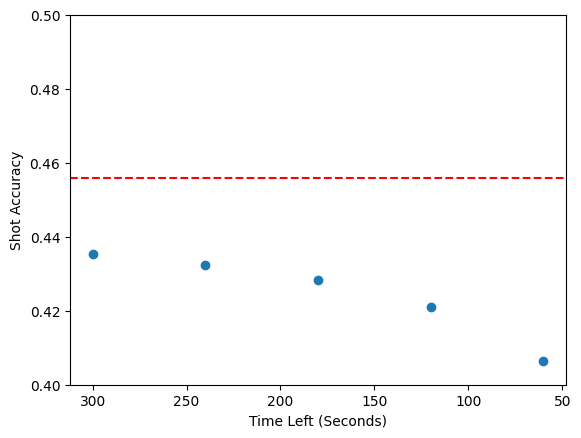

In [4]:
%run Data.ipynb
%run Code/Court.ipynb

In [60]:
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [5]:
def foot_conv(x,y):
    distance = np.sqrt((x - 0)**2 + (y - 4)**2).astype(int)
    for i in range(len(distance)):
        if y[i]<4: distance[i]= -distance[i]
    
    # If y is less than 4, return the distance multiplied by -1
    return distance

## 1. Score Difference 

In [7]:
dif = shot_df.groupby(['SCORE_DIFF'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
dif.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
dif.head()

,SCORE_DIFF,Frequency,Accuracy
0,1.0,162184,0.453349
1,2.0,208860,0.453490
2,3.0,226350,0.453855
3,4.0,224708,0.453482
4,5.0,252164,0.454593


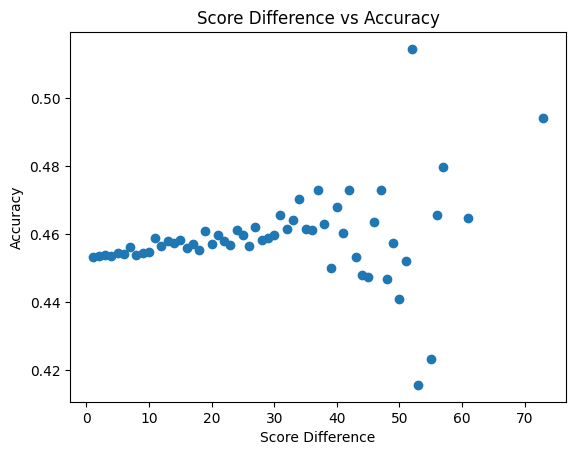

In [9]:
plt.scatter(dif['SCORE_DIFF'],dif['Accuracy'])
plt.title('Score Difference vs Accuracy')
plt.xlabel("Score Difference")
plt.ylabel("Accuracy")
plt.show()

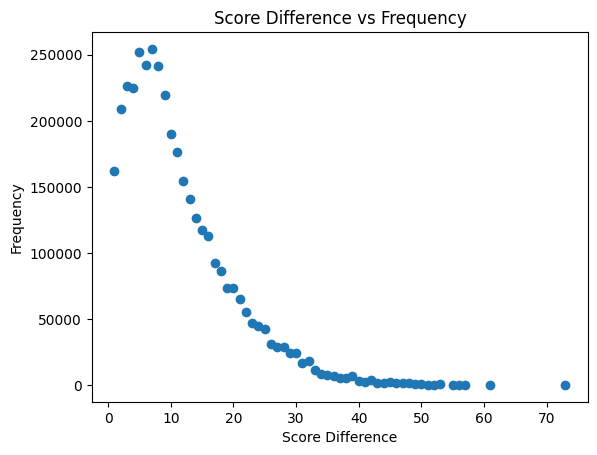

In [10]:
plt.scatter(dif['SCORE_DIFF'],dif['Frequency'])
plt.title('Score Difference vs Frequency')
plt.xlabel("Score Difference")
plt.ylabel("Frequency")
plt.show()

## 2. 2PT vs 3PT Over Seasons

In [11]:
season = shot_df.groupby(['SEASON_2','SHOT_TYPE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
season.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
season.head()

,SEASON_2,SHOT_TYPE,Frequency,Accuracy
0,2003-04,2PT Field Goal,154310,0.459679
1,2003-04,3PT Field Goal,35493,0.347167
2,2004-05,2PT Field Goal,158878,0.469908
3,2004-05,3PT Field Goal,38748,0.355554
4,2005-06,2PT Field Goal,155001,0.477932


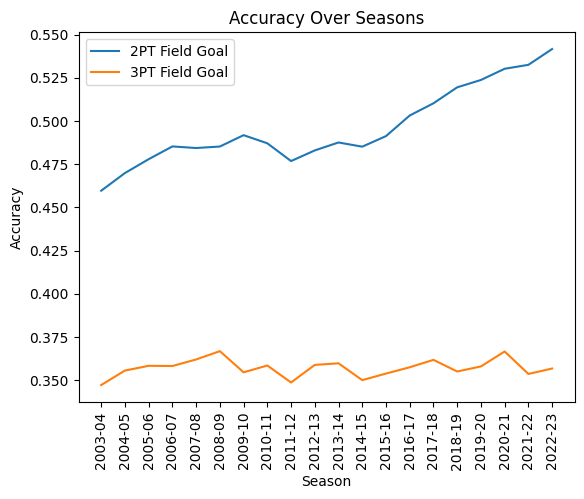

In [12]:
for shot_type, group in season.groupby('SHOT_TYPE'):
    plt.plot(group['SEASON_2'], group['Accuracy'], label=f'{shot_type}')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Seasons')

# Show legend
plt.legend()
plt.xticks(rotation=90)

# Display the plot
plt.show()

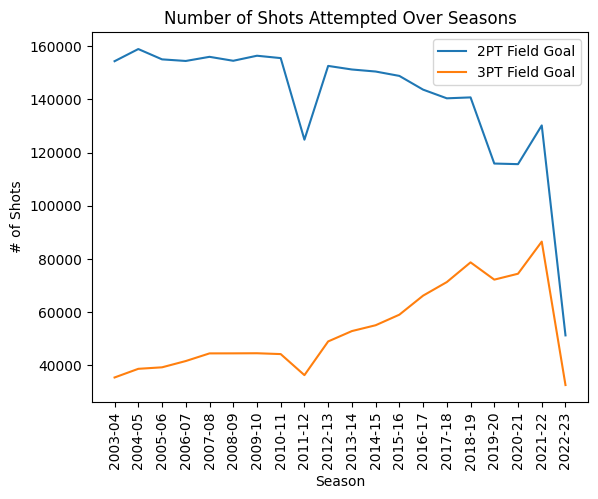

In [13]:
for shot_type, group in season.groupby('SHOT_TYPE'):
    plt.plot(group['SEASON_2'], group['Frequency'], label=f'{shot_type}')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('# of Shots')
plt.title('Number of Shots Attempted Over Seasons')

# Show legend
plt.legend()
plt.xticks(rotation=90)

# Display the plot
plt.show()

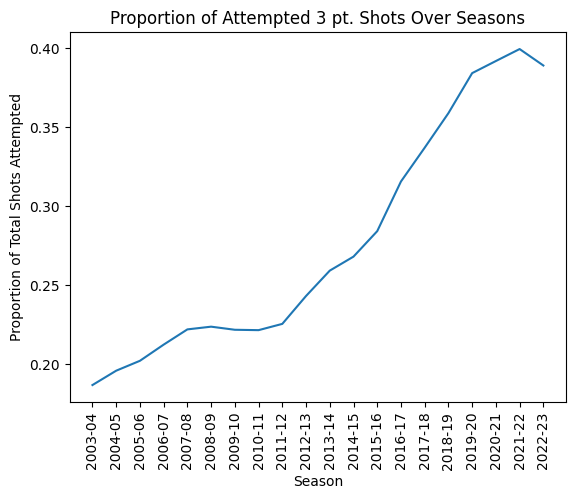

In [14]:
a, b =  season.groupby('SHOT_TYPE')
aa = a[1]
aa = aa.reset_index() 
bb=b[1] 
bb=bb.reset_index() 
plt.plot(aa['SEASON_2'], bb['Frequency']/(aa['Frequency']+bb['Frequency']))

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Proportion of Total Shots Attempted')
plt.title('Proportion of Attempted 3 pt. Shots Over Seasons')

plt.xticks(rotation=90)

# Display the plot
plt.show()

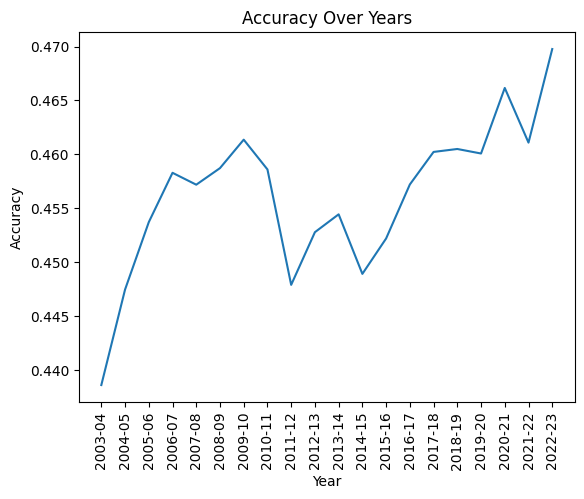

In [15]:
plt.plot(aa['SEASON_2'], (aa['Frequency']*aa['Accuracy']+bb['Frequency']
                          *bb['Accuracy'])/(aa['Frequency']+bb['Frequency']))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Years')

plt.xticks(rotation=90)

# Display the plot
plt.show()

## 3. Shot Distance

In [17]:
rang = shot_df.groupby(shot_df['SHOT_DISTANCE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang.rename(columns={'SHOT_DISTANCE':'Distance (ft.)','count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
# rang = rang.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)
rr = rang[rang['Frequency']>=100]
rr.sort_values(by='Accuracy', ascending=False).reset_index(drop=True).head()

,Distance (ft.),Frequency,Accuracy
0,0,593670,0.660180
1,1,308048,0.651580
2,2,223510,0.528853
3,3,114343,0.414630
4,16,110629,0.408166


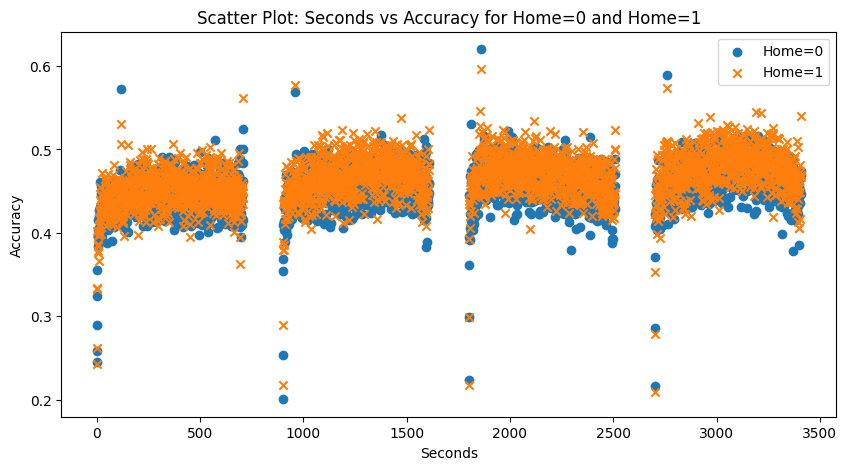

In [19]:
rang = shot_df.groupby(['TIME_LEFT_GAME','HOME'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
# rang = rang.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)
rr = rang[rang['Frequency']>=100]
plt.figure(figsize=(10,5))

home_0 = rr[rr['HOME'] == 0]
home_1 =rr[rr['HOME'] == 1]

# Create a scatter plot
plt.scatter(home_0['TIME_LEFT_GAME'], home_0['Accuracy'], label='Home=0', marker='o')
plt.scatter(home_1['TIME_LEFT_GAME'], home_1['Accuracy'], label='Home=1', marker='x')

# Add labels and title
plt.xlabel('Seconds')
plt.ylabel('Accuracy')
plt.title('Scatter Plot: Seconds vs Accuracy for Home=0 and Home=1')

# Add legend
plt.legend()

# Show the plot
plt.show()

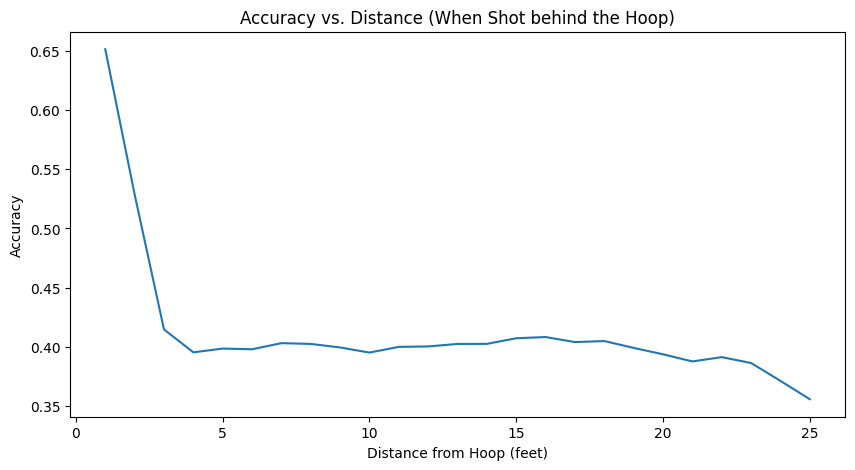

<Figure size 8000x2000 with 0 Axes>

In [20]:
behind_hoop = shot_df.groupby('SHOT_DISTANCE').filter(lambda x: (x['LOC_Y'] < 4).any())
behind_hoop = behind_hoop.groupby('SHOT_DISTANCE')['SHOT_MADE'].agg(['count', 'mean']).reset_index()
behind_hoop.rename(columns={'count': 'Frequency', 'mean': 'percentage_made'}, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(behind_hoop['SHOT_DISTANCE'],behind_hoop['percentage_made'])
plt.title("Accuracy vs. Distance (When Shot behind the Hoop)")
plt.xlabel("Distance from Hoop (feet)")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 26, step=5))
plt.figure(figsize=(80,20))
plt.show()


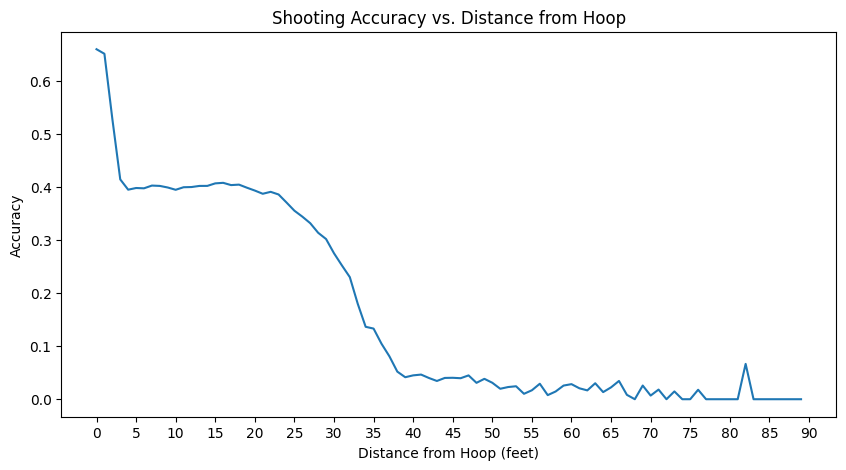

<Figure size 8000x2000 with 0 Axes>

In [21]:
rang = shot_df.groupby('SHOT_DISTANCE')['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang.rename(columns={'count': 'Frequency', 'mean': 'percentage_made'}, inplace=True)
# rang_subset = rang[rang['Frequency']>=100]

plt.figure(figsize=(10,5))
plt.plot(rang['SHOT_DISTANCE'],rang['percentage_made'])
plt.title("Shooting Accuracy vs. Distance from Hoop")
plt.xlabel("Distance from Hoop (feet)")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 91, step=5))
plt.figure(figsize=(80,20))
plt.show()

## 4. Shot Distance vs Basic Zone

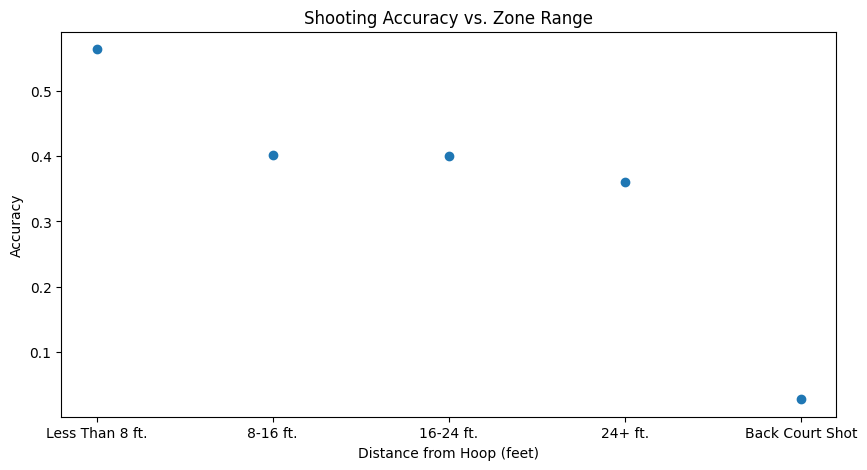

<Figure size 8000x2000 with 0 Axes>

In [23]:
range_zone = shot_df.groupby('ZONE_RANGE')['SHOT_MADE'].agg(['count', 'mean']).reset_index()
range_zone.rename(columns={'count': 'Frequency', 'mean': 'percentage_made'}, inplace=True)
range_zone = range_zone.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,5))

plt.scatter(range_zone['ZONE_RANGE'],range_zone['percentage_made'])
plt.title("Shooting Accuracy vs. Zone Range")
plt.xlabel("Distance from Hoop (feet)")
plt.ylabel("Accuracy")
plt.figure(figsize=(80,20))
plt.show()

## 5. Shot Distance and Position 

In [24]:
rang_pos = shot_df.groupby(['SHOT_DISTANCE', 'POSITION'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang_pos.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
rang_pos = rang_pos.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
rang_pos_over_1000_shots = rang_pos[rang_pos['Frequency']>=1000].reset_index(drop=True)
rang_pos_over_1000_shots

,SHOT_DISTANCE,POSITION,Frequency,Accuracy
0,0,C,151709,0.695707
1,1,C,71219,0.676701
2,0,PF,134164,0.674436
3,0,SF,103704,0.667390
4,1,PF,64909,0.666995
...,...,...,...,...
156,28,C,1123,0.300089
157,28,SF,3363,0.297948
158,30,PG,1520,0.280263
159,29,SF,1255,0.274104


In [26]:
rang_pos = shot_df.groupby(['SHOT_DISTANCE', 'POSITION','HOME'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang_pos.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
rang_pos = rang_pos.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
rang_pos_over_100_shots = rang_pos[rang_pos['Frequency']>=100].reset_index(drop=True)
rang_pos_over_100_shots

,SHOT_DISTANCE,POSITION,HOME,Frequency,Accuracy
0,1,PF-C,True,219,0.726027
1,1,C-PF,False,262,0.702290
2,0,C,True,75712,0.695834
3,0,C,False,75997,0.695580
4,1,C-PF,True,241,0.688797
...,...,...,...,...,...
606,39,SG,True,109,0.036697
607,41,PG,False,149,0.033557
608,39,PG,False,134,0.029851
609,40,PG,False,168,0.029762


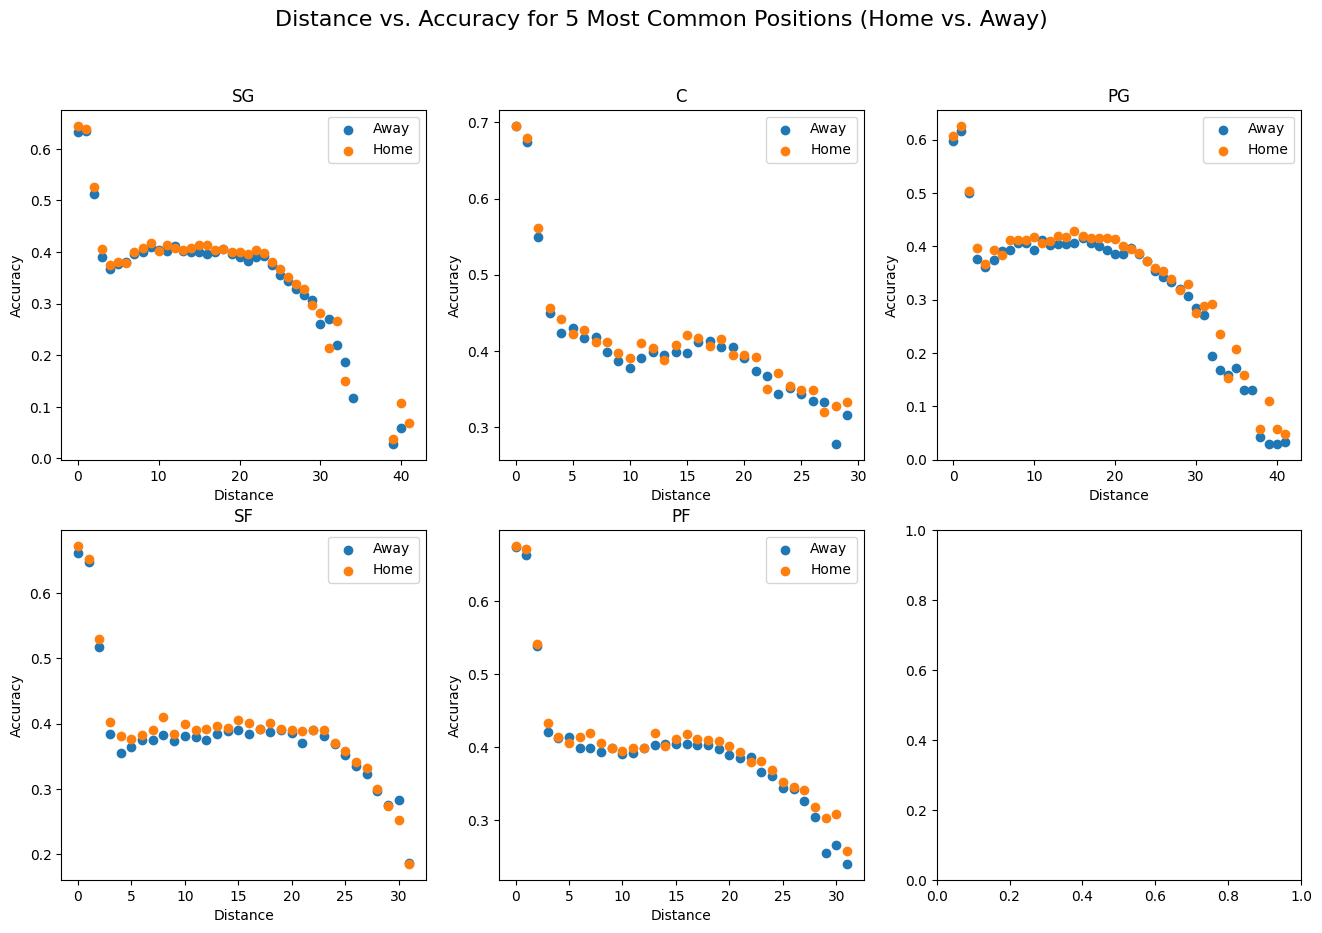

In [27]:
fig, axes = plt.subplots(2,3,figsize=(16, 10))
i = 0
for i,p in enumerate(shot_df['POSITION'].unique()[:5]):
    model=rang_pos_over_100_shots[rang_pos_over_100_shots['POSITION']==p]
    model0 = model[model['HOME']==0]
    model1 = model[model['HOME']==1]
    row, col = divmod(i, 3)
    axes[row, col].scatter(model0['SHOT_DISTANCE'],model0['Accuracy'], label="Away")
    axes[row, col].scatter(model1['SHOT_DISTANCE'],model1['Accuracy'], label='Home')
    axes[row, col].set_title(f"{p}")
    axes[row,col].set_xlabel('Distance')
    axes[row,col].set_ylabel('Accuracy')
    axes[row,col].legend()
#     axes[row, col].legend()
#     plt.title("Shooting Accuracy vs. Distance from Hoop")
#     axes[row, col].xlabel("Distance from Hoop (feet)")
#     axes[row, col].ylabel("Accuracy")
#     axes[row, col].set_xticks(np.arange(-25, 76, step=5))
# fig.text(0.5, 0.04, 'Value', ha='center', va='center', fontsize=14)
# fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Distance vs. Accuracy for 5 Most Common Positions (Home vs. Away)', fontsize=16)

plt.show()

In [28]:
rang_pos_gp = shot_df.groupby(['SHOT_DISTANCE', 'POSITION_GROUP'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang_pos_gp.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)

rpg = rang_pos_gp[rang_pos_gp['Frequency']>=100]
rang_pos_gp


,SHOT_DISTANCE,POSITION_GROUP,Frequency,Accuracy
0,0,C,153515,0.694675
1,0,F,243658,0.670493
2,0,G,196497,0.620442
3,1,C,71722,0.676836
4,1,F,117066,0.659491
...,...,...,...,...
263,88,F,2,0.000000
264,88,G,2,0.000000
265,89,C,1,0.000000
266,89,F,2,0.000000


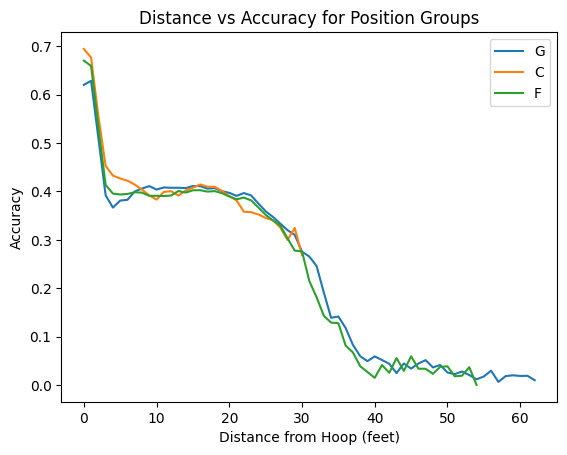

In [29]:
for p in shot_df['POSITION_GROUP'].unique():
    model = rpg[rpg['POSITION_GROUP']==p]
    plt.plot(model['SHOT_DISTANCE'],model['Accuracy'], label=f"{p}")
    plt.title("Distance vs Accuracy for Position Groups")
#     plt.title("Shooting Accuracy vs. Distance from Hoop")
    plt.xlabel("Distance from Hoop (feet)")
    plt.ylabel("Accuracy")
#     plt.xticks(np.arange(-25, 76, step=5))
plt.legend()
plt.show()

## 6. Position vs Zone

In [30]:
pos = shot_df.groupby(['POSITION_GROUP', 'BASIC_ZONE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
pos.rename(columns={'count': 'frequency', 'mean': 'percentage_made'}, inplace=True)
pos = pos.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)
ppp = pos[pos['frequency']>=100]
pos

,POSITION_GROUP,BASIC_ZONE,frequency,percentage_made
0,C,Restricted Area,301056,0.646219
1,F,Restricted Area,488107,0.621257
2,G,Restricted Area,450408,0.578305
3,C,In The Paint (Non-RA),131917,0.420992
4,G,Mid-Range,462171,0.401051
5,F,In The Paint (Non-RA),214634,0.399620
6,G,In The Paint (Non-RA),227661,0.399375
7,C,Mid-Range,139180,0.397536
8,F,Mid-Range,396118,0.394004
9,G,Right Corner 3,65676,0.393721


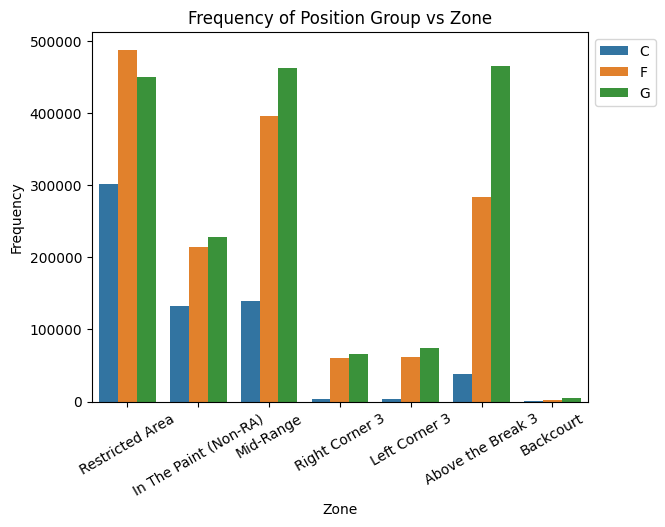

In [31]:
sns.barplot(x=pos['BASIC_ZONE'], y=pos["frequency"],hue=pos['POSITION_GROUP'])
plt.title(f"Frequency of Position Group vs Zone")
plt.xlabel("Zone")
plt.ylabel("Frequency")
plt.xticks(rotation=30)
# plt.legend(bar, df['POSITION_GROUP'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

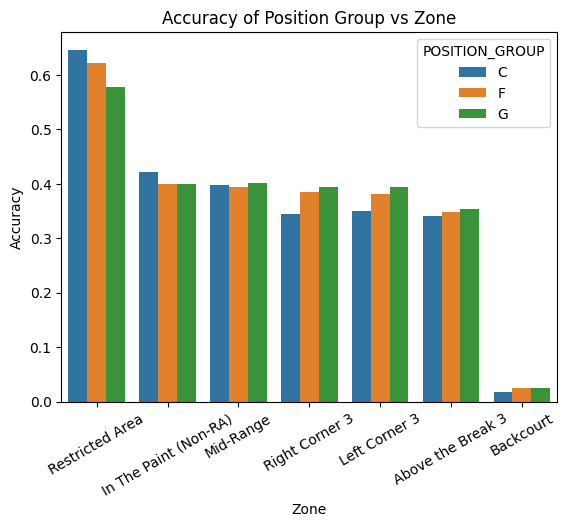

In [32]:
sns.barplot(x=pos['BASIC_ZONE'], y=pos["percentage_made"],hue=pos['POSITION_GROUP'])
plt.title(f"Accuracy of Position Group vs Zone")
plt.xlabel("Zone")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

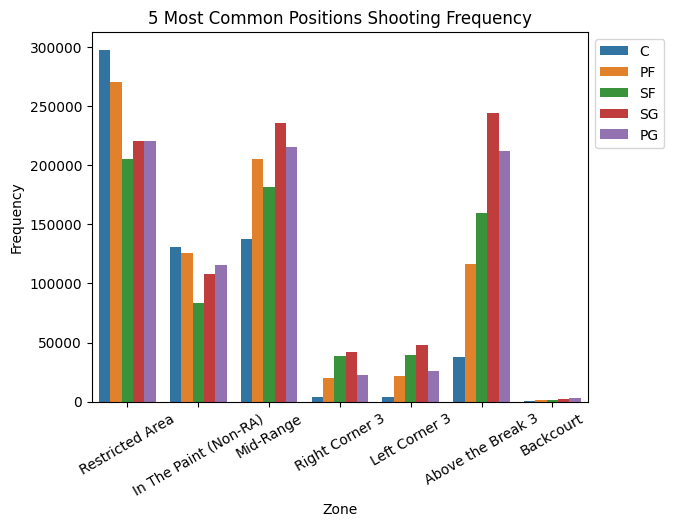

In [34]:
pos = shot_df.groupby(['POSITION', 'BASIC_ZONE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
pos.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
pos = pos.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
pos = pos[pos['POSITION'].isin(['SG', 'C', 'PG', 'SF', 'PF'])]
sns.barplot(x=pos['BASIC_ZONE'], y=pos["Frequency"],hue=pos['POSITION'])
plt.xlabel("Zone")
plt.ylabel("Frequency")
plt.xticks(rotation=30)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("5 Most Common Positions Shooting Frequency")
plt.show()

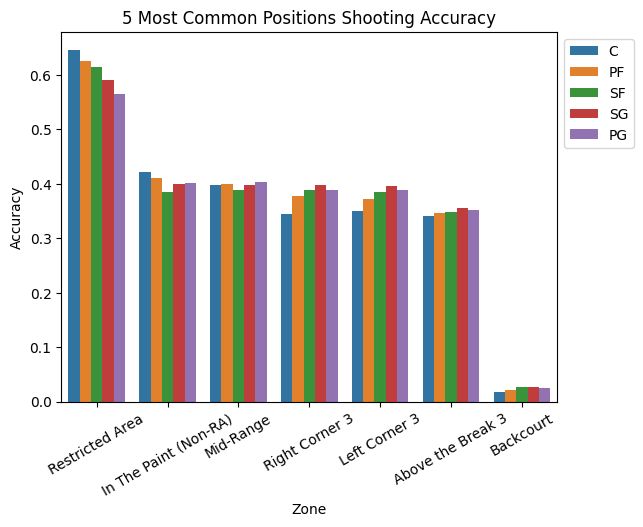

In [35]:
sns.barplot(x=pos['BASIC_ZONE'], y=pos["Accuracy"],hue=pos['POSITION'])
plt.title("5 Most Common Positions Shooting Accuracy")
plt.xlabel("Zone")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

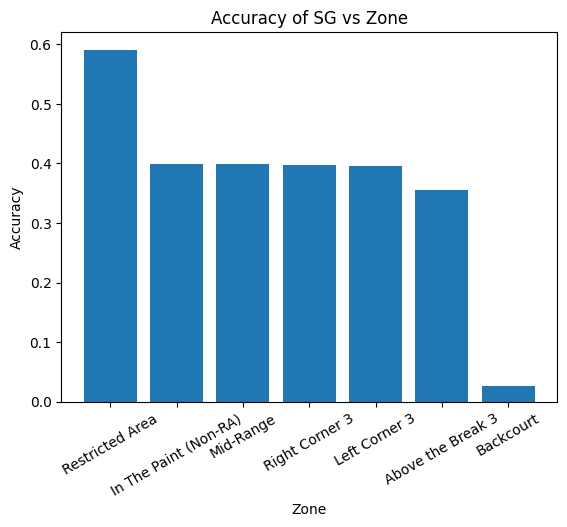

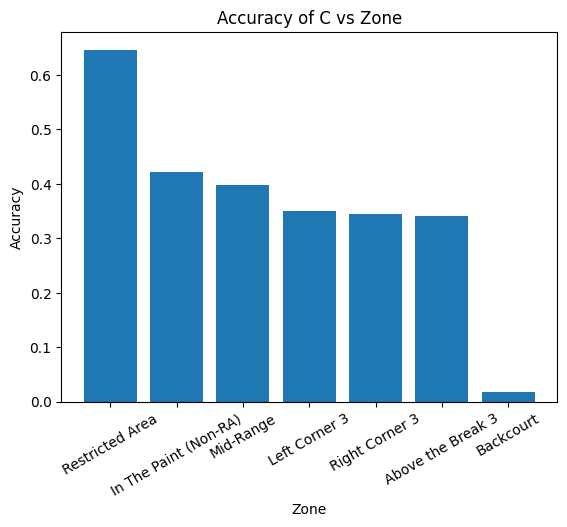

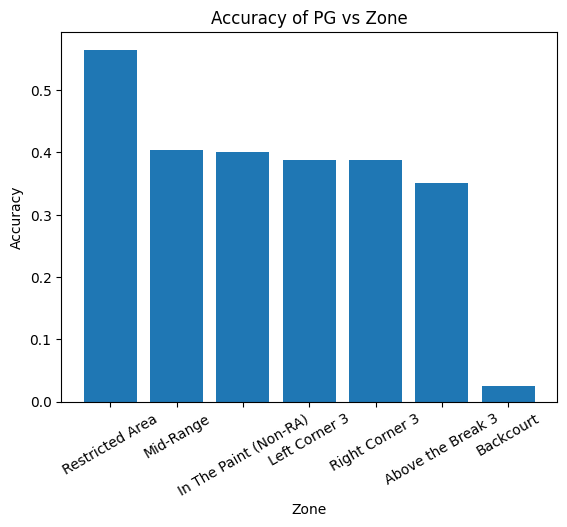

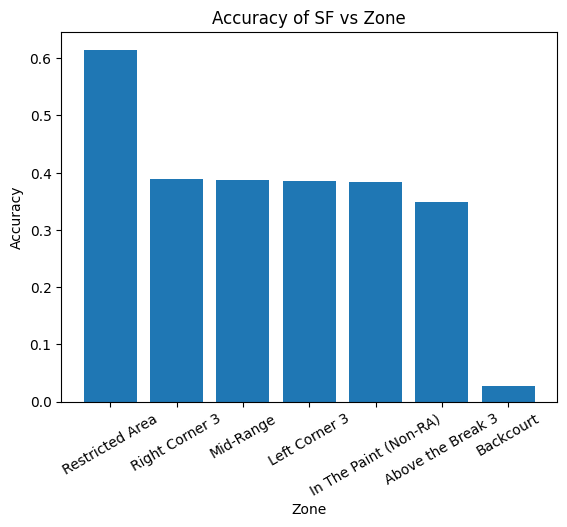

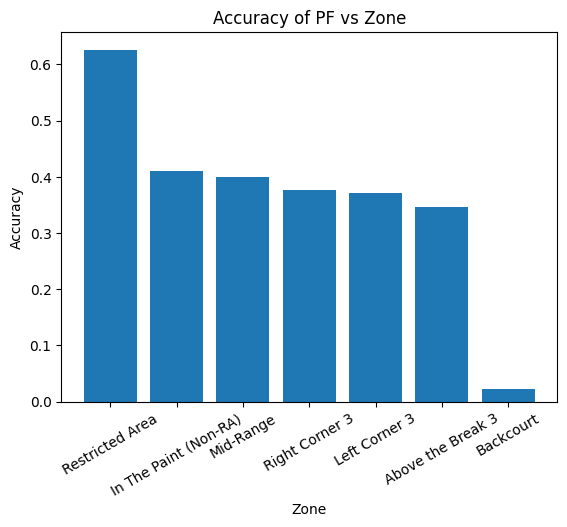

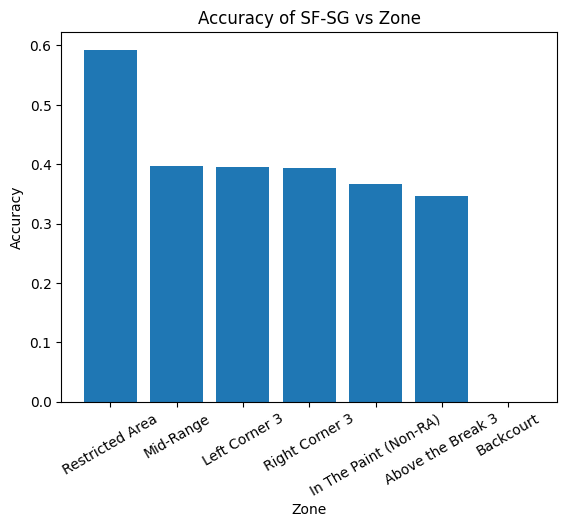

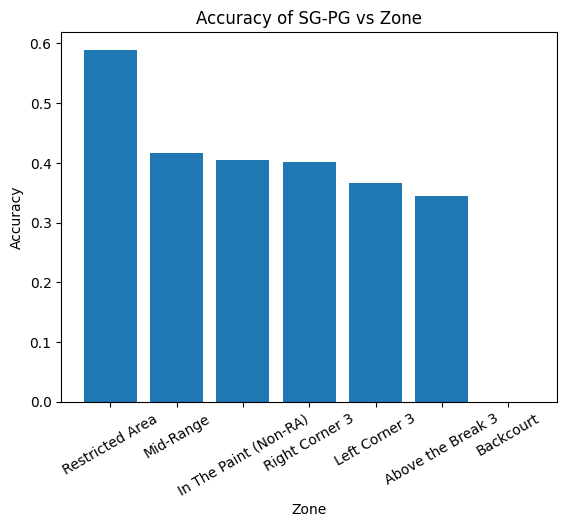

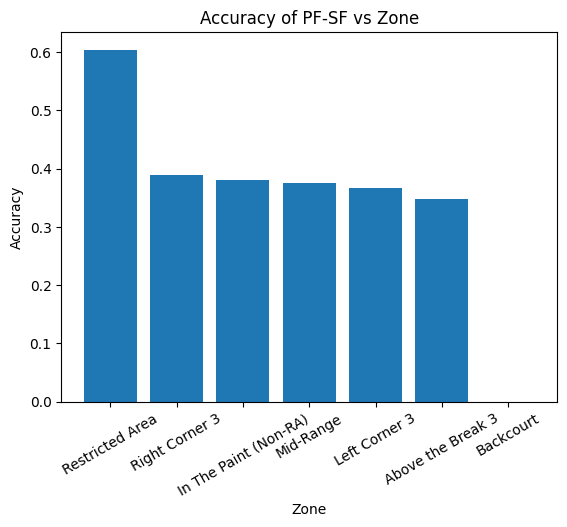

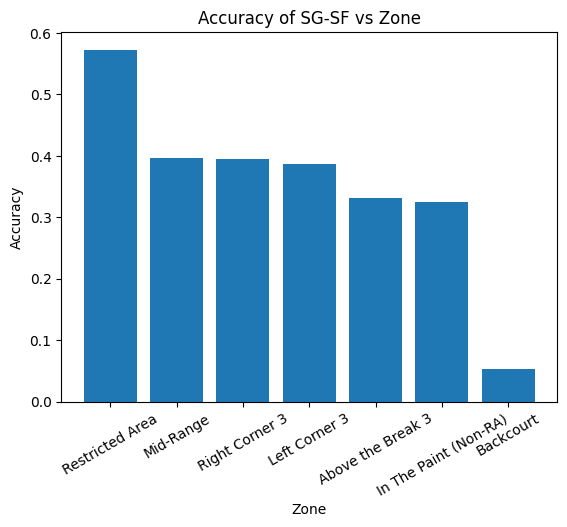

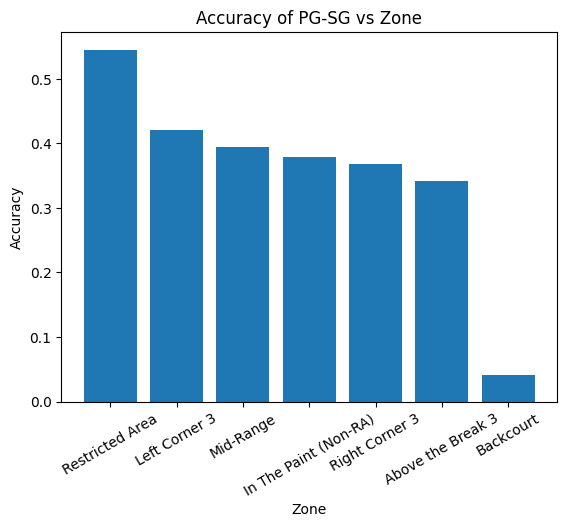

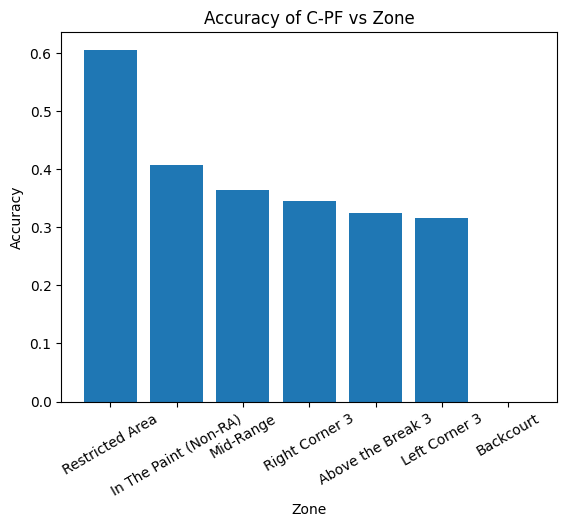

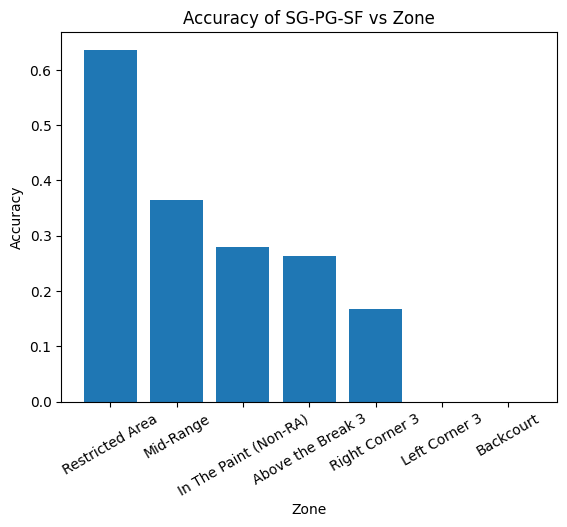

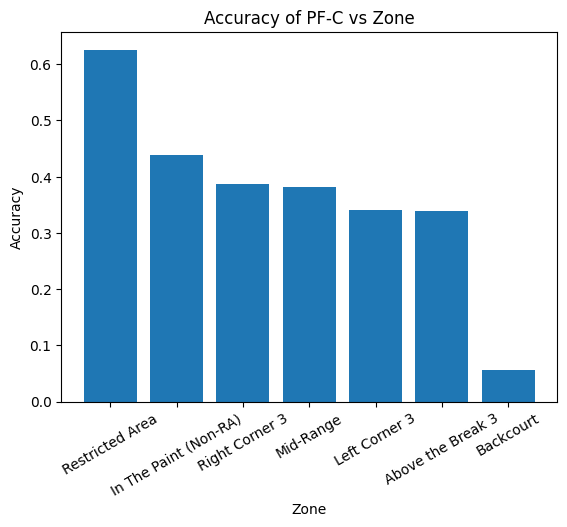

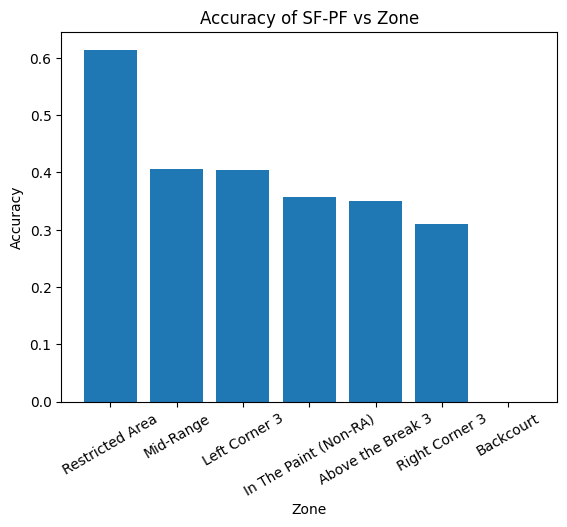

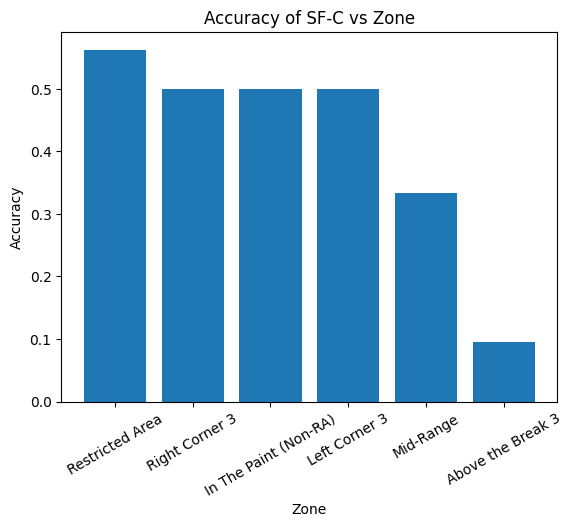

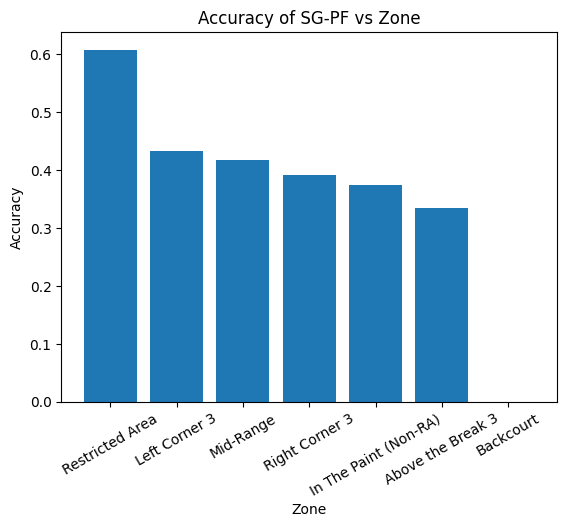

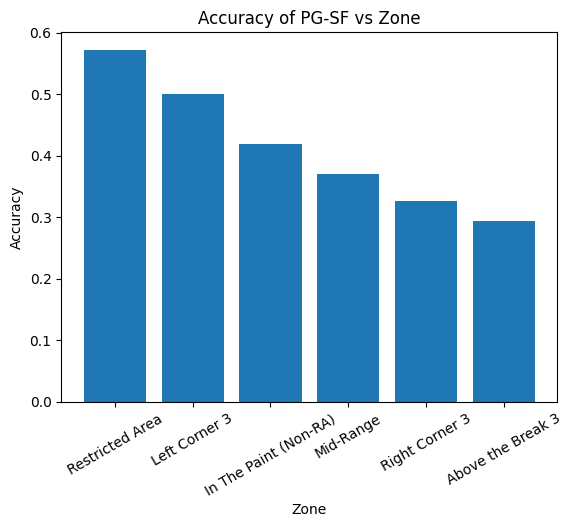

In [37]:
pos = shot_df.groupby(['POSITION', 'BASIC_ZONE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
pos.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
pos = pos.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
# pos = pos[pos['shots']>=100]
for pg in shot_df['POSITION'].unique():
    model = pos[(pos['POSITION']==pg)]
    plt.bar(model['BASIC_ZONE'], model["Accuracy"], label = f'{pg}')
    plt.title(f"Accuracy of {pg} vs Zone")
    plt.xlabel("Zone")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=30)
# plt.legend()
    plt.show()

## 7. Time in Game

In [38]:
time_stats = shot_df[shot_df['TIME_LEFT_GAME']>=0].groupby(['TIME_LEFT_GAME'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
time_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
time_stats= time_stats.sort_values('Accuracy').reset_index(drop=True)
time_stats

,TIME_LEFT_GAME,Frequency,Accuracy
0,3420,4,0.000000
1,3419,1,0.000000
2,1617,1,0.000000
3,1616,4,0.000000
4,3418,5,0.200000
...,...,...,...
2876,719,3,0.666667
2877,2516,6,0.666667
2878,2517,2,1.000000
2879,1619,1,1.000000


In [39]:
def game_time(x):
    q = 4-int(x/720)
    m = int((x%720)/60)
    s = (x%720)%60

    return q,m,s

In [40]:
sorted_time_stats = time_stats[time_stats['Frequency']>=100]
sorted_time_stats=sorted_time_stats.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
sorted_time_stats[['QUARTER', 'MINS_LEFT', 'SECS_LEFT']] = sorted_time_stats['TIME_LEFT_GAME'].apply(lambda x: pd.Series(game_time(x)))
sorted_time_stats = sorted_time_stats[['TIME_LEFT_GAME','QUARTER', 'MINS_LEFT', 'SECS_LEFT','Frequency','Accuracy']]
sorted_time_stats

,TIME_LEFT_GAME,QUARTER,MINS_LEFT,SECS_LEFT,Frequency,Accuracy
0,3414,0,8,54,124,0.620968
1,1860,2,7,0,1657,0.608932
2,2760,1,10,0,1735,0.581556
3,960,3,4,0,1660,0.572892
4,712,4,11,52,108,0.564815
...,...,...,...,...,...,...
2846,1,4,0,1,2826,0.259731
2847,0,4,0,0,5927,0.244137
2848,1800,2,6,0,14526,0.220157
2849,2700,1,9,0,14290,0.212666


In [41]:
time_stats[['QUARTER', 'MINS_LEFT', 'SECS_LEFT']] = time_stats['TIME_LEFT_GAME'].apply(lambda x: pd.Series(game_time(x)))


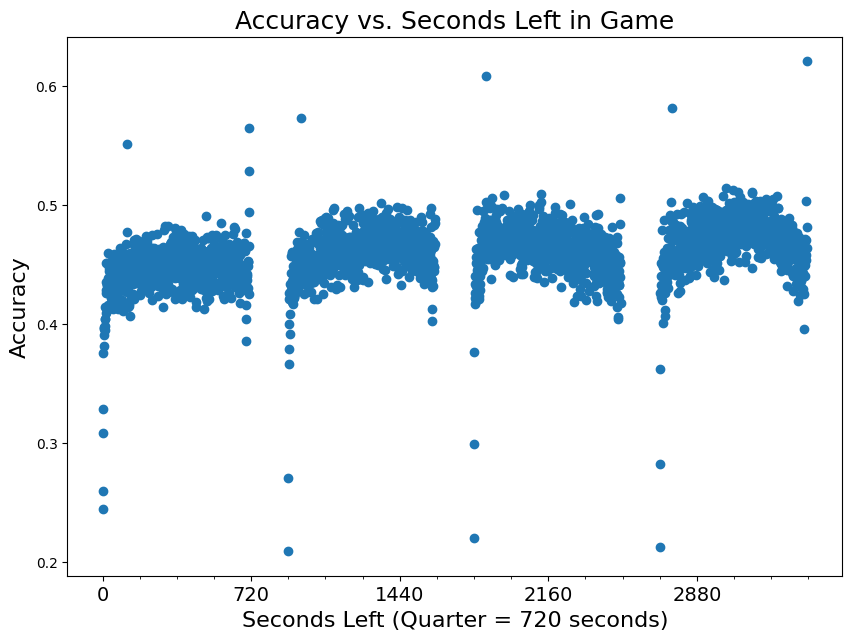

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(sorted_time_stats["TIME_LEFT_GAME"],sorted_time_stats["Accuracy"])

plt.xlabel('Seconds Left (Quarter = 720 seconds)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy vs. Seconds Left in Game', fontsize=18)

plt.xticks(ticks=range(0, 2901 + 1, 180), labels=range(0, 2901 + 1, 180))
plt.xticks(ticks=range(0, 2901 + 1, 720), labels=range(0, 2901 + 1, 720), fontsize=16)
major_locator = MultipleLocator(180)
minor_locator = MultipleLocator(720)

plt.gca().xaxis.set_major_locator(minor_locator)
plt.gca().xaxis.set_minor_locator(major_locator)
plt.xticks(fontsize=14)
plt.show()

In [45]:
print("Quarter and Time Left in Quarter: Lowest Accuracies")
sorted_time_stats[['QUARTER', 'MINS_LEFT', 'SECS_LEFT','Frequency','Accuracy']].tail(15)

Quarter and Time Left in Quarter: Lowest Accuracies


,QUARTER,MINS_LEFT,SECS_LEFT,Frequency,Accuracy
2836,3,3,3,2324,0.378657
2837,2,6,2,3287,0.376635
2838,4,0,4,1705,0.375953
2839,3,3,2,3272,0.366443
2840,1,9,2,3321,0.362240
2841,4,0,3,1864,0.328326
2842,4,0,2,2145,0.308625
2843,2,6,1,5701,0.299070
2844,1,9,1,5505,0.282652
2845,3,3,1,5700,0.270877


In [46]:
sorted_time_stats.head(10)

,TIME_LEFT_GAME,QUARTER,MINS_LEFT,SECS_LEFT,Frequency,Accuracy
0,3414,0,8,54,124,0.620968
1,1860,2,7,0,1657,0.608932
2,2760,1,10,0,1735,0.581556
3,960,3,4,0,1660,0.572892
4,712,4,11,52,108,0.564815
5,120,4,2,0,1635,0.551682
6,711,4,11,51,225,0.528889
7,3020,0,2,20,1389,0.514759
8,3057,0,2,57,1381,0.512672
9,3149,0,4,29,1414,0.511315


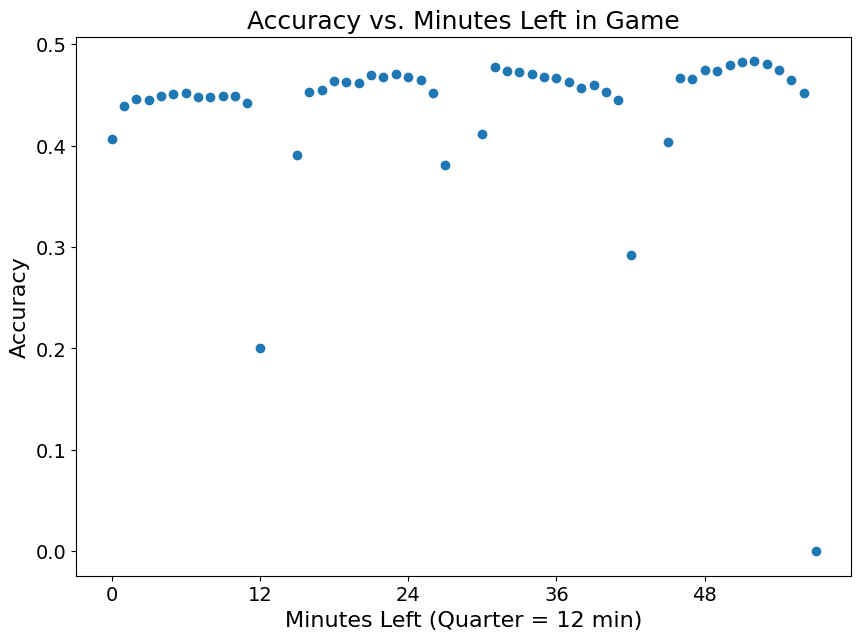

In [47]:
mins = shot_df[shot_df['TIME_LEFT_GAME']>=0].copy()
mins["min_left"]=(shot_df['TIME_LEFT_GAME']/60).astype(int)
mins_stats = mins[mins['min_left']>=0].groupby(['min_left'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
mins_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)

plt.figure(figsize=(10,7))
plt.scatter(mins_stats['min_left'],mins_stats['Accuracy'])
plt.xticks(np.arange(0, 50, step=12),fontsize=14)

plt.xlabel('Minutes Left (Quarter = 12 min)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy vs. Minutes Left in Game', fontsize=18)
plt.yticks(fontsize=14)

plt.show()

## 8. ACTION_TYPE, BASIC_ZONE, POSITION

In [48]:
shot_stats = shot_df.groupby(['ACTION_TYPE', 'BASIC_ZONE', 'POSITION'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
shot_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
sorted_shot_stats = shot_stats.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

sorted_shot_stats[sorted_shot_stats['Frequency']>=100]

,ACTION_TYPE,BASIC_ZONE,POSITION,Frequency,Accuracy
347,Reverse Slam Dunk Shot,Restricted Area,C,103,0.990291
348,Running Slam Dunk Shot,Restricted Area,PF,334,0.988024
349,Running Slam Dunk Shot,Restricted Area,C,242,0.987603
350,Running Slam Dunk Shot,Restricted Area,SG,185,0.983784
351,Slam Dunk Shot,Restricted Area,C-PF,159,0.981132
...,...,...,...,...,...
2105,Jump Shot,Backcourt,SG,1685,0.016024
2106,Jump Shot,Backcourt,PG,2174,0.015179
2107,Jump Shot,Backcourt,PF,896,0.013393
2108,Running Jump Shot,Backcourt,SF,175,0.011429


In [49]:
print("Lowest Percentage Shots Excluding Backcourt:")
sorted_shot_stats[(sorted_shot_stats['Frequency']>=100)&(sorted_shot_stats['BASIC_ZONE']!='Backcourt')].tail(10)

Lowest Percentage Shots Excluding Backcourt:


,ACTION_TYPE,BASIC_ZONE,POSITION,Frequency,Accuracy
2014,Driving Layup Shot,Mid-Range,PG,132,0.227273
2022,Jump Shot,In The Paint (Non-RA),SG-PF,131,0.221374
2023,Driving Layup Shot,In The Paint (Non-RA),SG-PG,114,0.219298
2025,Jump Shot,In The Paint (Non-RA),SF-PF,396,0.212121
2046,Jump Shot,In The Paint (Non-RA),PG-SG,524,0.192748
2049,Jump Shot,Restricted Area,SF,4888,0.185761
2053,Driving Layup Shot,In The Paint (Non-RA),SF-SG,113,0.176991
2065,Jump Shot,Restricted Area,SG,4726,0.154888
2074,Driving Layup Shot,Mid-Range,SG,139,0.136691
2075,Jump Shot,Restricted Area,PG,4881,0.128457


## 9. Action Type and Action Group

### 9a. ACTION_TYPE

In [53]:
action_type_stats = shot_df.groupby(['ACTION_TYPE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
action_type_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
action_type_stats = action_type_stats.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
action_type_stats#[action_type_stats['shots']>=100]

,ACTION_TYPE,Frequency,Accuracy
0,Running Slam Dunk Shot,1109,0.982867
1,Slam Dunk Shot,23562,0.978992
2,Driving Slam Dunk Shot,3680,0.969565
3,Reverse Slam Dunk Shot,429,0.960373
4,Running Reverse Dunk Shot,151,0.953642
...,...,...,...
64,Step Back Jump shot,67611,0.441777
65,Driving Floating Jump Shot,47679,0.431154
66,Running Pull-Up Jump Shot,7900,0.430633
67,Driving Jump shot,7764,0.420015


In [54]:
action_type_stats.sort_values(by='Frequency', ascending=False).reset_index(drop=True).head(10)

,ACTION_TYPE,Frequency,Accuracy
0,Jump Shot,1900344,0.344073
1,Layup Shot,429114,0.463208
2,Driving Layup Shot,257614,0.610371
3,Pullup Jump shot,189044,0.468505
4,Step Back Jump shot,67611,0.441777
5,Turnaround Jump Shot,66172,0.475337
6,Dunk Shot,65457,0.870159
7,Hook Shot,63255,0.447965
8,Running Jump Shot,60075,0.487591
9,Fadeaway Jump Shot,57505,0.480654


### 9b. Compare ACTION_GROUP vs ACTION_TYPE

In [55]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(shot_df['ACTION_TYPE']), shot_df['SHOT_MADE'], test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy for Type: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Type: 0.6287905939381438
Confusion Matrix:
[[371454  49784]
 [238152 116280]]
Classification Report:
              precision    recall  f1-score   support

       False       0.61      0.88      0.72    421238
        True       0.70      0.33      0.45    354432

    accuracy                           0.63    775670
   macro avg       0.65      0.60      0.58    775670
weighted avg       0.65      0.63      0.60    775670



In [56]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(shot_df['ACTION_GROUP']), shot_df['SHOT_MADE'], test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy for Group: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy for Group: 0.6187051194451249
Confusion Matrix:
[[329319  91919]
 [203840 150592]]
Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.78      0.69    421238
        True       0.62      0.42      0.50    354432

    accuracy                           0.62    775670
   macro avg       0.62      0.60      0.60    775670
weighted avg       0.62      0.62      0.61    775670



In [61]:
np.random.seed(42)
categories = [f'Category_{i}' for i in range(1, len(shot_df['ACTION_GROUP'].unique())+1)]

# Fit logistic regression model
X = pd.get_dummies(shot_df['ACTION_GROUP'], drop_first=True)  # Drop one category to avoid multicollinearity
X = sm.add_constant(X)  # Add a constant for the intercept
y = shot_df['SHOT_MADE']

model = sm.Logit(y, X)
result = model.fit()

# Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650336
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              SHOT_MADE   No. Observations:              3878348
Model:                          Logit   Df Residuals:                  3878340
Method:                           MLE   Df Model:                            7
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                 0.05649
Time:                        18:51:58   Log-Likelihood:            -2.5222e+06
converged:                       True   LL-Null:                   -2.6732e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6502      0.010     64.790      0.000       0.630       0.670
dunk shot  

In [62]:
np.random.seed(42)
categories = [f'Category_{i}' for i in range(1, len(shot_df['ACTION_TYPE'].unique())+1)]

# Fit logistic regression model
X = pd.get_dummies(shot_df['ACTION_TYPE'], drop_first=True)  # Drop one category to avoid multicollinearity
X = sm.add_constant(X)  # Add a constant for the intercept
y = shot_df['SHOT_MADE']

model = sm.Logit(y, X)
result = model.fit()

# Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.640741
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              SHOT_MADE   No. Observations:              3878348
Model:                          Logit   Df Residuals:                  3878279
Method:                           MLE   Df Model:                           68
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                 0.07041
Time:                        18:52:42   Log-Likelihood:            -2.4850e+06
converged:                       True   LL-Null:                   -2.6732e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.2137      0.021    

### 9d. ACTION_GROUP Analysis

In [63]:
action_gp_stats = shot_df.groupby(['ACTION_GROUP'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
action_gp_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
action_gp_stats = action_gp_stats.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
action_gp_stats= action_gp_stats[action_gp_stats['ACTION_GROUP']!='no shot']

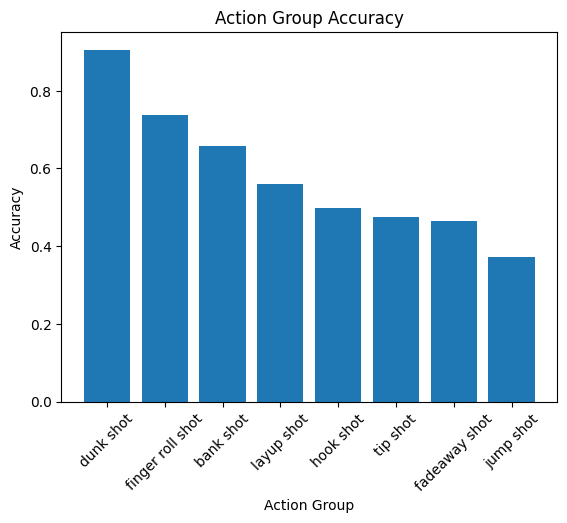

In [64]:
plt.bar(action_gp_stats['ACTION_GROUP'],action_gp_stats['Accuracy'])
plt.xlabel("Action Group")
plt.ylabel("Accuracy")
plt.title("Action Group Accuracy")
plt.xticks(rotation=45)
plt.show()

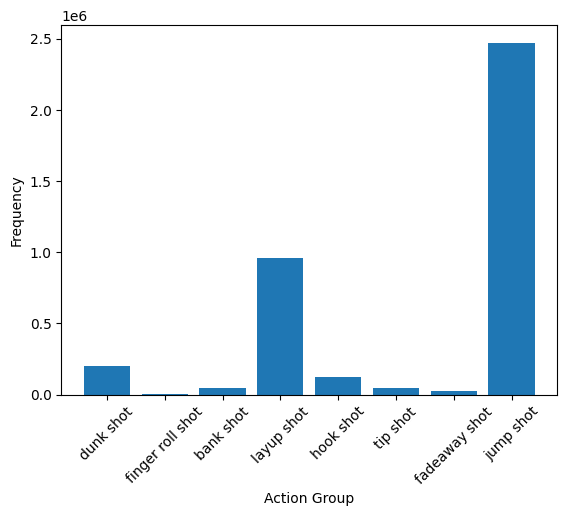

In [65]:
plt.bar(action_gp_stats['ACTION_GROUP'],action_gp_stats['Frequency'])
plt.xlabel("Action Group")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [66]:
action_gp_stats.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

,ACTION_GROUP,Frequency,Accuracy
0,jump shot,2472309,0.373016
1,layup shot,959922,0.559161
2,dunk shot,198798,0.905809
3,hook shot,125939,0.497979
4,tip shot,47027,0.475195
5,bank shot,44070,0.657046
6,fadeaway shot,25109,0.464933
7,finger roll shot,5174,0.738500


In [67]:
zone_action = shot_df.groupby(['BASIC_ZONE','ACTION_GROUP'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
zone_action.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
zone_action = zone_action.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

za = zone_action[zone_action['Frequency']>=100]
zone_action.head()

,BASIC_ZONE,ACTION_GROUP,Frequency,Accuracy
0,Above the Break 3,dunk shot,2,1.000000
1,Restricted Area,dunk shot,197173,0.908202
2,Restricted Area,finger roll shot,4415,0.758324
3,Restricted Area,bank shot,3871,0.743994
4,In The Paint (Non-RA),bank shot,20778,0.688998


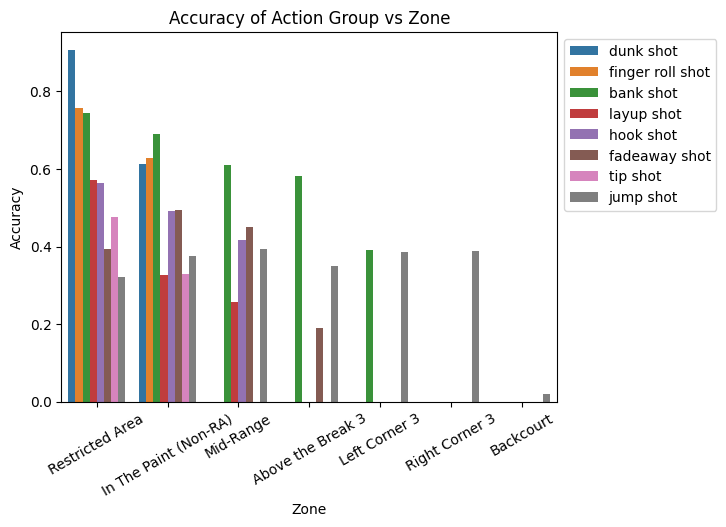

In [68]:
sns.barplot(x='BASIC_ZONE', y='Accuracy', hue='ACTION_GROUP', data=za)
plt.title(f"Accuracy of Action Group vs Zone")
plt.xlabel("Zone")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
# plt.legend(bar, df['POSITION_GROUP'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Basic Zone

In [63]:
zone_stats = shot_df.groupby(['BASIC_ZONE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
zone_stats.rename(columns={'count': 'shots', 'mean': 'percentage_made'}, inplace=True)
zone_stats = zone_stats.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)
zone_stats

,BASIC_ZONE,shots,percentage_made
0,Restricted Area,1279336,0.613490
1,In The Paint (Non-RA),601090,0.406535
2,Mid-Range,1013252,0.398207
3,Right Corner 3,136096,0.387814
4,Left Corner 3,148133,0.386362
5,Above the Break 3,826267,0.350833
6,Backcourt,8387,0.024800
